In [10]:
from scipy.stats import norm
from scipy.stats import t
import numpy as np
import pandas as pd
from numpy.random import seed
import matplotlib.pyplot as plt

data = pd.read_csv("../data/waze_cleaned.csv")

In [11]:
sessions = data["sessions"]

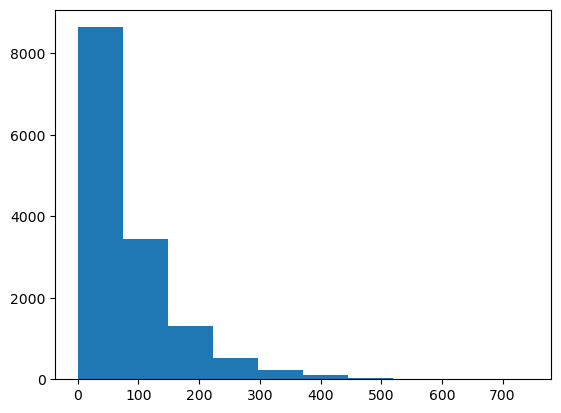

In [12]:
plt.hist(sessions);